In [1]:
# Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

#Importação das bibliotecas utilizadas
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Biblioteca Multinomial NB
from sklearn.naive_bayes import MultinomialNB

In [2]:
#É instanciado um grupo com 20 assuntos do scikit, que serão utilizados para classificar os documentos em categorias.
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
#Defino as categorias que serão consideradas. E as que serão consideradas para treinamento e teste.
categories = ['comp.windows.x', 'comp.os.ms-windows.misc', 'misc.forsale', 'rec.autos']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
#Converto o texto em número de ocorrências de palavras (representação numérica). Uma matriz de contadores.
cv = CountVectorizer()

#Instancio objeto do classificador Multinomial Naive Bayes
mnb = MultinomialNB()

#Criado um pipeline que utiliza os dados vetorizados no classificador Naive Bayes Multinomial
model = make_pipeline(cv, mnb)

In [5]:
#É treinado o modelo com os dados de treinamento
model.fit(train.data, train.target)

#Validação do modelo com os dados de teste
labels = model.predict(test.data)

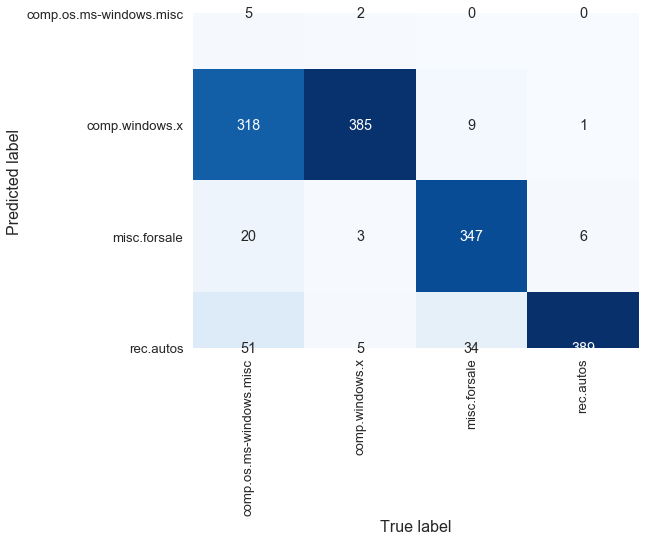

In [11]:
#Plotada a matriz de confusão, que ilustra o desempenho do classificador.
fig = plt.figure(figsize=(8,8))

mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.2)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")

plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)

plt.savefig("confusion_matrix_text_classification.png", dpi=600)
plt.show()

In [ ]:
'''
A) Para a classe 'comp.os.ms-windows.misc', observa-se que a maioria das predições realizadas estão erradas.

B) Uma possível causa pela grande quantia de predições erradas, é a utilização de palavras similares na classe 
'comp.windows.x'. O que gera confusão no momento da interpretação pelo classificador.

'''